In [293]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import statistics

# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [294]:
# Some system stuff
#

# Reading csv
df_covid19_cases_time= pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv")

# Country input
input_country = "Ukraine"

# Date
yesterdays_date = (datetime.today() - timedelta(days=1)).strftime('%#m/%#d/%y')

In [295]:
european_countries_data = [
    {'Country': 'Austria', 'Close_Countries': ['Czechia','Slovakia','Slovenia','Hungary','Croatia', 'Liechtenstein', 'Germany']},
    {'Country': 'Belgium','Close_Countries': ['Netherlands', 'France', 'Luxembourg', 'Germany', 'Denmark']},
    {'Country': 'Czechia','Close_Countries': ['Slovakia','Poland','Hungary','Croatia', 'Austria', 'Germany']},
    {'Country': 'Denmark','Close_Countries': ['Sweden','Poland','Germany','Norway','Netherlands']},
    {'Country': 'Estonia','Close_Countries': ['Latvia','Lithuania','Sweden','Finland']},
    {'Country': 'Finland','Close_Countries': ['Latvia','Norway','Lithuania','Sweden','Estonia']},
    {'Country': 'France','Close_Countries': ['Spain','Italy','Germany','Belgium','Switzerland']},
    {'Country': 'Germany','Close_Countries': ['Poland','Czechia','Austria','Belgium','Switzerland','Netherlands']},
    {'Country': 'Hungary','Close_Countries': ['Slovakia','Czechia','Austria','Croatia', 'Ukraine']},
    {'Country': 'Italy','Close_Countries': ['Spain','France','Portugal','Croatia']},
    {'Country': 'Latvia','Close_Countries': ['Estonia','Lithuania','Belarus']},
    {'Country': 'Liechtenstein','Close_Countries': ['Switzerland','Luxembourg','Slovenia']},
    {'Country': 'Lithuania','Close_Countries': ['Estonia','Latvia','Belarus']},
    {'Country': 'Luxembourg','Close_Countries': ['Switzerland','Liechtenstein','Slovenia']},
    {'Country': 'Netherlands','Close_Countries': ['Belgium', 'France', 'Luxembourg', 'Germany', 'Denmark']},
    {'Country': 'Norway','Close_Countries': ['Sweden', 'Finland']},
    {'Country': 'Poland','Close_Countries': ['Germany','Czechia','Slovakia','Ukraine','Belarus']},
    {'Country': 'Portugal','Close_Countries': ['Spain','Italy']},
    {'Country': 'Slovakia','Close_Countries': ['Poland','Czechia','Austria','Hungary','Ukraine']},
    {'Country': 'Slovenia','Close_Countries': ['Switzerland','Liechtenstein','Croatia']},
    {'Country': 'Spain','Close_Countries': ['Portugal','Italy','France']},
    {'Country': 'Sweden','Close_Countries': ['Norway','Finland','Poland']},
    {'Country': 'Switzerland','Close_Countries': ['Liechtenstein','Luxembourg','Slovenia','Belgium','Austria']},
    {'Country': 'Ukraine',"Close_Countries": ["Belarus","Poland","Slovakia","Hungary","Romania"]},
    {'Country': 'Belarus','Close_Countries': ['Lithuania','Poland','Latvia','Ukraine']}
]

european_countries_data = pd.DataFrame(european_countries_data)

In [296]:
def visualize_result(result_data_frame):
    # Prepare Data
    df = result_data_frame[['Deaths', 'Min deaths (best-case scenario)','Most likely deaths', 'Max deaths (Worst-case scenario)']]
    df.sort_values('Deaths', inplace=True)
    df.reset_index(inplace=True)

    df['Deaths'] = df['Deaths'] / 1000 
    df['Min'] = df['Min deaths (best-case scenario)'] / 1000 
    df['Expected'] = df['Most likely deaths'] / 1000 
    df['Max'] = df['Max deaths (Worst-case scenario)'] / 1000 

    df["Country"] = df["index"]


    # Draw plot official Deaths
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
    ax.vlines(x=df.index, ymin=0, ymax=df.Deaths, color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x=df.index, y=df.Deaths, s=75, color='firebrick', alpha=0.7)

    # Title, Label, Ticks and Ylim
    ax.set_title('Lollipop Chart for expected Deaths x1000', fontdict={'size':22})
    ax.set_ylabel('Victims')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.Country.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
    ax.set_ylim(0, 30)

    # Annotate
    for row in df.itertuples():
        ax.text(row.Index, row.Expected+.5, s=round(row.Expected, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

    plt.show()

In [297]:
# territorical defs
def get_close_countries():
    close_countries = european_countries_data[european_countries_data["Country"]==input_country]
    close_countries = np.array(close_countries["Close_Countries"])[0]
    close_countries_data = df_covid19_cases_time[df_covid19_cases_time["Country_Region"].isin(close_countries)]
    close_countries_data = close_countries_data[close_countries_data["Last_Update"] == yesterdays_date].copy().drop(['Last_Update', 'Recovered', 'Active', 'Delta_Confirmed', 'Delta_Recovered', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Province_State', 'FIPS', 'UID', 'iso3', 'Report_Date_String'], axis=1)
    close_countries_data.index = close_countries_data["Country_Region"]
    close_countries_data = close_countries_data.drop(['Country_Region'], axis=1)
    return close_countries_data

def get_input_country(country_name):
    input_country_data = df_covid19_cases_time[df_covid19_cases_time["Country_Region"] == country_name]
    input_country_data = input_country_data[input_country_data["Last_Update"] == yesterdays_date].copy().drop(['Last_Update', 'Recovered', 'Active', 'Delta_Confirmed', 'Delta_Recovered', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Province_State', 'FIPS', 'UID', 'iso3', 'Report_Date_String'], axis=1)
    input_country_data.index = input_country_data["Country_Region"]
    input_country_data = input_country_data.drop(['Country_Region'], axis=1)
    return input_country_data

In [298]:
# medical defs
def get_medical_ratings():
    medical_rating = pd.read_csv("data/medical_system.csv")
    medical_rating = medical_rating.copy().drop(['Health Distribution','Overall goal attainment', 'Health expenditure per capita in international dollars'],axis =1)
    medical_rating.index = medical_rating["Country"]
    medical_rating = medical_rating.drop(['Country'], axis=1)
    return medical_rating

In [299]:
#population defs
def get_population_data():
    population = format_population()
    population.index = population["Country"]
    population = population.drop(['Country'], axis=1)
    return population

def get_input_country_population_data():
    population = format_population()
    return population[population["Country"] == input_country]["Population"]

def format_population():
    population = pd.read_csv("data/population_by_country.csv")
    return population.copy().drop(['Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],axis=1)

In [300]:
# Gettting all countries close to the inputted one
close_countries_data = get_close_countries()

# Getting all the medical rankings
medical_rating = get_medical_ratings()

# Merging medical rankings into close countries to process only ones we actually need
close_countries_data = pd.merge(close_countries_data, medical_rating, left_index=True, right_index=True)

# Getting population to filter close countries by it
population = get_population_data()

# Also getting the population of the input country
input_country_population = get_input_country_population_data()

# Saving all the data to one dataframe
close_countries_data = pd.merge(close_countries_data, population, left_index=True, right_index=True)

# Getting all the countries that does not fit filter
# It is filtered this way so that we analize comparable countries with limited difference in population
not_actual_population_countries_index = close_countries_data[(close_countries_data['Population'] > int(input_country_population * 3.5)) | (close_countries_data['Population'] < int(input_country_population * 0.2))].index

# Dropping countries that doesnot fit the filter
close_countries_data.drop(not_actual_population_countries_index , inplace=True)

# Calculation of the custom coefficient
# It basically the infection to death ratio, but also it takes the helth system performance to make this analysis fare
close_countries_data["coef"] = close_countries_data["Deaths"] /  ( close_countries_data["Confirmed"] * close_countries_data["Overall health system performance"])

# Getting top 2 close countries by the health level
# Here we assume, that the higher Health level - the less falsification going on
top_2_countries_by_health_level = close_countries_data.sort_values("Health Level").head(2)

# Calculation the average ratio, that should equals to the same retios in close countries
average_coef_by_most_healthy_counties = sum(top_2_countries_by_health_level["coef"]) / len(top_2_countries_by_health_level["coef"]) 

# Getting max and min values to calculate worst-case and best-case scenarios respectively
max_coef = max(close_countries_data["coef"])
min_coef = min(close_countries_data["coef"])

# Prognosing each scenario
close_countries_data["Most likely deaths"] = average_coef_by_most_healthy_counties * close_countries_data["Confirmed"] * close_countries_data["Overall health system performance"]
close_countries_data["Min deaths (best-case scenario)"] = average_coef_by_most_healthy_counties * close_countries_data["Confirmed"] * close_countries_data["Overall health system performance"]
close_countries_data["Max deaths (Worst-case scenario)"] = max_coef * close_countries_data["Confirmed"] * close_countries_data["Overall health system performance"]

# Calculation each falsification scenario
close_countries_data["Falsification %"] = (1 - close_countries_data["Deaths"] / close_countries_data["Most likely deaths"]) * 100
close_countries_data["best-case scenario falsification %"] = (1 - close_countries_data["Deaths"] / close_countries_data["Min deaths (best-case scenario)"]) * 100
close_countries_data["worst-case scenario falsification %"] = (1 - close_countries_data["Deaths"] / close_countries_data["Max deaths (Worst-case scenario)"]) * 100


# Getting the input country
input_country_data = get_input_country(input_country)

input_country_data = pd.merge(input_country_data, medical_rating, left_index=True, right_index=True)

# Input country calcucation
input_country_data["Most likely deaths"] = average_coef_by_most_healthy_counties * input_country_data["Confirmed"] * input_country_data["Overall health system performance"]
input_country_data["Min deaths (best-case scenario)"] = min_coef * input_country_data["Confirmed"] * input_country_data["Overall health system performance"]
input_country_data["Max deaths (Worst-case scenario)"] = max_coef * input_country_data["Confirmed"] * input_country_data["Overall health system performance"]

# general falsification
falsification = (1 - input_country_data["Deaths"] / input_country_data["Most likely deaths"]) * 100

if (float (falsification) < 0):
    falsification = 0
    
if (float (falsification) > 100):
    falsification = 100
    
input_country_data["Falsification %"] = falsification

# best case scenario falsification
best_case_scenario_falsification = (1 - input_country_data["Deaths"] / input_country_data["Min deaths (best-case scenario)"]) * 100

if (float (best_case_scenario_falsification) < 0):
    best_case_scenario_falsification = 0
    
input_country_data["best-case scenario falsification %"] = best_case_scenario_falsification

# worst case scenario falsification
worst_case_scenario_falsification = (1 - input_country_data["Deaths"] / input_country_data["Max deaths (Worst-case scenario)"]) * 100

if (float (worst_case_scenario_falsification) > 100):
    worst_case_scenario_falsification = 100

input_country_data["worst-case scenario falsification %"] = worst_case_scenario_falsification

input_country_data.style.background_gradient(cmap='coolwarm',axis=1).format("{:.2f}").format("{:.0f}")

,Confirmed,Deaths,Delta_Deaths,Health Level,On level of health,Overall health system performance,Most likely deaths,Min deaths (best-case scenario),Max deaths (Worst-case scenario),Falsification %,best-case scenario falsification %,worst-case scenario falsification %
Ukraine,527808,9604,182,70,101,79,12856,5359,13810,25,0,30


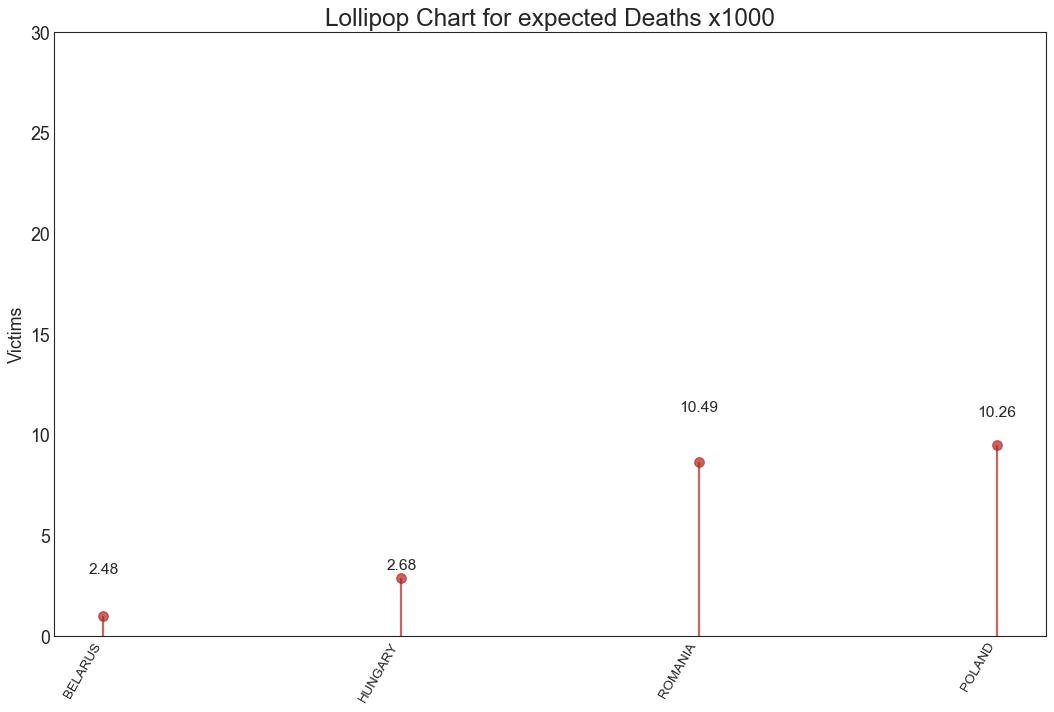

In [301]:
visualize_result(close_countries_data)